<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/%E6%9C%80%E7%9F%ADPytorch/%EF%BC%97%E7%AB%A0_%E5%A4%9A%E5%80%A4%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#７章_多値分類

In [1]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [2]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
# torch関連ライブラリのインポート

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [4]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=4)

In [5]:
#データ読み込み

from sklearn.datasets import load_iris

iris = load_iris()

x_org, y_org = iris.data, iris.target

print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [6]:
print(x_org[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
#1列目と3列目にしぼる(がく片（sepal）と花弁(petal)のlengtn)
x_select = x_org[:,[0,2]]

print('元データ', x_select.shape, y_org.shape)

元データ (150, 2) (150,)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


In [10]:
#　データを正解値ごとに分割

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

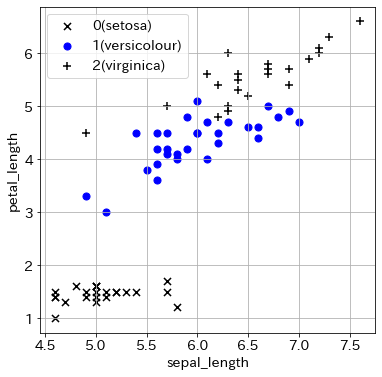

In [13]:
# 散布図の表示
plt.scatter(x_t0[:,0],x_t0[:,1],marker='x', c='k', s=50, label='0(setosa)')
plt.scatter(x_t1[:,0],x_t1[:,1],marker='o', c='b', s=50, label='1(versicolour)')
plt.scatter(x_t2[:,0],x_t2[:,1],marker='+', c='k', s=50, label='2(virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()